# Student Performance Dataset Analysis Using Exploratory Data Analysis (EDA) and Statistical Testing

### Understanding the factors that influence student academic performance is an important area in data analytics, as it helps in identifying key patterns that may affect learning outcomes. In this project, we analyze the Student Performance dataset from Kaggle, which contains information about students’ demographics, parental education, lunch type, test preparation, and exam scores in Math, Reading, and Writing.

### The objective of this analysis is to:

### Perform Exploratory Data Analysis (EDA) to understand the dataset structure and distribution of marks.

### Classify attributes into nominal, ordinal, and continuous data types.

### Analyze summary statistics including mean, standard deviation, skewness, and kurtosis.

### Visualize the data using histograms, boxplots, and pair plots.

### Check if there is a significant difference in performance between groups using:

### T-test (e.g., Male vs Female performance)

### One-way ANOVA (performance across race/ethnic groups)

### Z-test

### Chi-square test

### Draw insights based on p-values and statistical results.

## 1.Import and load the dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency

# For nicer plots
sns.set(style="whitegrid")

# Load Kaggle dataset
df = pd.read_csv("StudentsPerformance.csv")

# See first 10 rows
df.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## 2.Column type classification (theory)

### Nominal:
### gender, race/ethnicity, parental level of education, lunch, test preparation course
### Labels only, no order.

### Ordinal: (optional)
### Conceptually: parental level of education (high school < some college < bachelor’s < master’s),
### but stored as text so we treat as nominal unless we encode order.

### Continuous:
### math score, reading score, writing score

### Discrete:
### None (scores are integers but usually treated as continuous in statistics).

## 3.Structure

In [4]:
# Info about columns and types
df.info()

# Shape (rows, columns)
df.shape

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## 4.Summary Statistics

In [5]:
# Summary stats of numeric columns
df[['math score', 'reading score', 'writing score']].describe()

# Skewness
skew_values = df[['math score', 'reading score', 'writing score']].skew()
print("Skewness:\n", skew_values)

# Kurtosis
kurt_values = df[['math score', 'reading score', 'writing score']].kurtosis()
print("Kurtosis:\n", kurt_values)


Skewness:
 math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64
Kurtosis:
 math score       0.274964
reading score   -0.068265
writing score   -0.033365
dtype: float64


## 5.Visualizations
### a. Histogram with KDE for math score
### b. Boxplot of math score by gender
### c. Pairplot of all scores colored by gender

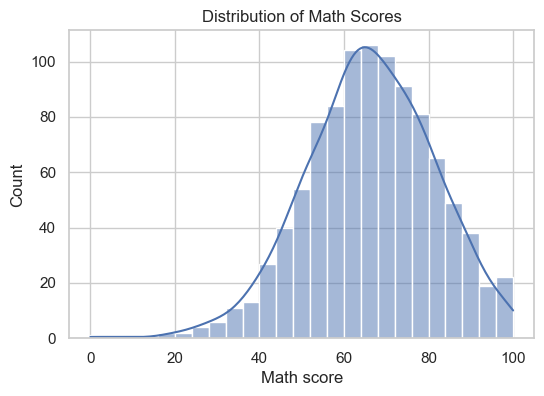

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df['math score'], kde=True)
plt.title("Distribution of Math Scores")
plt.xlabel("Math score")
plt.ylabel("Count")
plt.show()


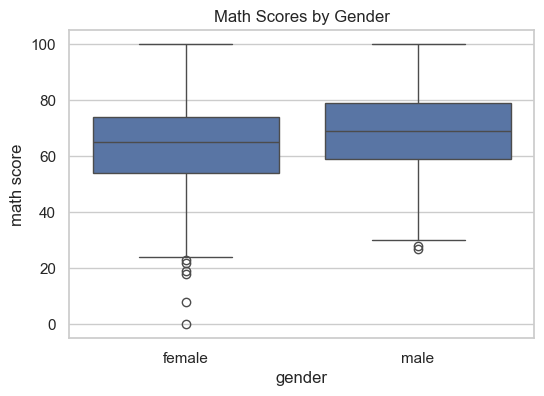

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='math score', data=df)
plt.title("Math Scores by Gender")
plt.show()


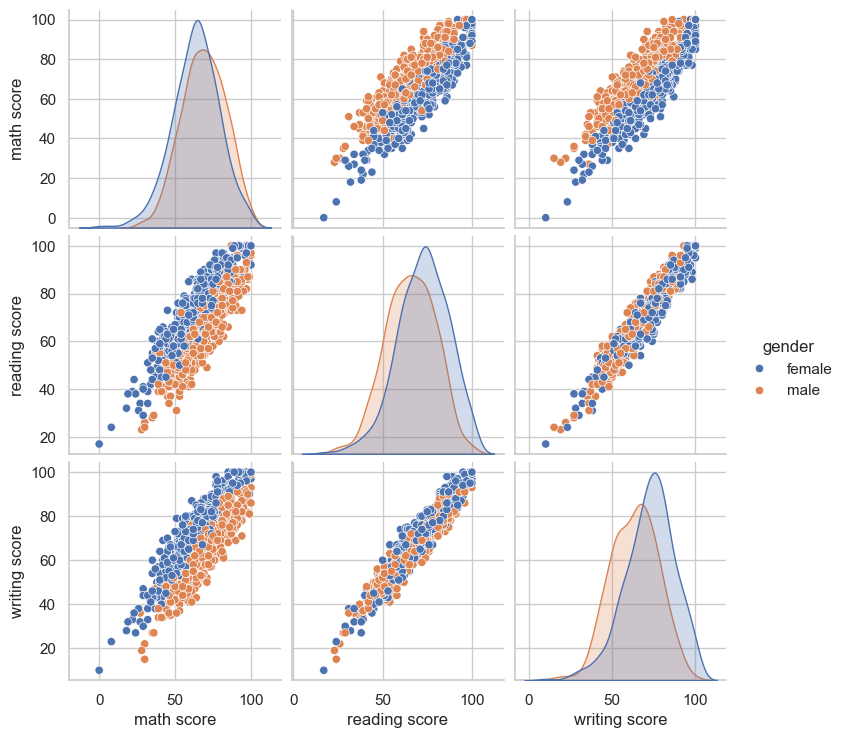

In [8]:
sns.pairplot(df[['math score', 'reading score', 'writing score', 'gender']], hue='gender')
plt.show()



## 6.Z-score for math score (standardization)

In [9]:
mean_math = df['math score'].mean()
std_math = df['math score'].std()

df['math_z'] = (df['math score'] - mean_math) / std_math

df[['math score', 'math_z']].head()


,math score,math_z
0,72,0.389828
1,69,0.191979
2,90,1.576922
3,47,-1.258913
4,76,0.653627


## 7.Independent t-test (Math score: Male vs Female)

In [10]:
# Split by gender
math_male = df[df['gender'] == 'male']['math score']
math_female = df[df['gender'] == 'female']['math score']

print(len(math_male), len(math_female))

# Welch's t-test (doesn't assume equal variance)
t_stat, p_val = ttest_ind(math_male, math_female, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_val)


482 518
t-statistic: 5.398000564160736
p-value: 8.420838109090415e-08


## 8.One-way ANOVA (Math score across race/ethnicity groups)

In [11]:
# Get unique race groups
races = df['race/ethnicity'].unique()
print(races)

# Create list of math scores for each race group
groups = [df[df['race/ethnicity'] == r]['math score'] for r in races]

for r, g in zip(races, groups):
    print(r, "sample size:", len(g))

# ANOVA
f_stat, p_val = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_val)


['group B' 'group C' 'group A' 'group D' 'group E']
group B sample size: 190
group C sample size: 319
group A sample size: 89
group D sample size: 262
group E sample size: 140
F-statistic: 14.593885166332637
p-value: 1.3732194030370688e-11


## 9.One-sample z-test (Is mean math score = 70?)

In [12]:
z_stat, p_val = ztest(df['math score'], value=70)
print("z-statistic:", z_stat)
print("p-value:", p_val)


z-statistic: -8.156435137590153
p-value: 3.450576781557642e-16


## 10.Chi-square test

In [13]:
# Create high/low math level based on median
median_math = df['math score'].median()
df['math_level'] = np.where(df['math score'] > median_math, 'High', 'Low')

# Contingency table
cont_table = pd.crosstab(df['race/ethnicity'], df['math_level'])
print(cont_table)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)
print("Chi2 statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)


math_level      High  Low
race/ethnicity           
group A           31   58
group B           78  112
group C          140  179
group D          146  116
group E           98   42
Chi2 statistic: 44.69112080413517
p-value: 4.609467166583671e-09
Degrees of freedom: 4
